In [51]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree

In [52]:
loans = pd.read_csv('lending-club-data.csv', low_memory=False)
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,0.4,1.0,1.0,1.0,0,8.14350,20141201T000000,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,0.8,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,1.0,1.0,1.0,1.0,0,8.25955,20141201T000000,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,0.2,1.0,1.0,1.0,0,8.27585,20141201T000000,0,1,1
4,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,...,0.8,1.0,1.0,1.0,0,5.21533,20141201T000000,1,1,1


In [53]:
loans.shape

(122607, 68)

In [54]:
loans.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'is_inc_v', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans',
       'bad_loans', 'emp_length_num', 'grade_num', '

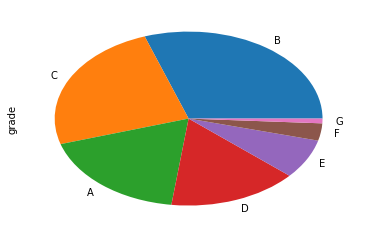

In [55]:
loans['grade'].value_counts().plot(kind='pie')

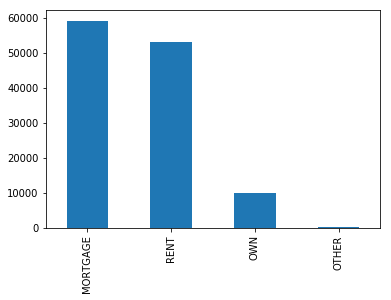

In [56]:
loans['home_ownership'].value_counts().plot(kind='bar')

In [57]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.drop('bad_loans', 1)

 Around 81.12% are safe loan and 18.88% are risky loan


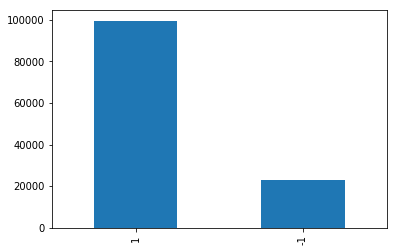

In [58]:
loans['safe_loans'].value_counts().plot(kind='bar')
safe = sum(loans['safe_loans'] == 1)
risky = sum(loans['safe_loans'] == -1)
total = safe + risky
print(' Around %.2f%% are safe loan and %.2f%% are risky loan' \
      %(safe/total*100.0, risky/total*100.0) )

In [59]:
features = ['grade',              # grade of the loan
            'term',               # the term of the loan
            'home_ownership',     # home_ownership status: own, mortgage or rent
            'emp_length',         # number of years of employment
           ]
target = 'safe_loans'
loans = loans[features + [target]]

In [60]:
safe_loans_raw = loans[loans[target] == +1]
risky_loans_raw = loans[loans[target] == -1]
N1 = len(safe_loans_raw)
N2 = len(risky_loans_raw)
N = N1 + N2
print( "# of safe loans  : %s" % N1 )
print( "# of risky loans : %s" % N2 )
print( "%% of safe loans  : %.2f%%" %(N1/N*100.0) )
print( "%% of risky loans : %.2f%%" %(N2/N*100.0) )

# of safe loans  : 99457
# of risky loans : 23150
% of safe loans  : 81.12%
% of risky loans : 18.88%


In [61]:
safe_loans_raw = loans[loans[target] == +1]
risky_loans_raw = loans[loans[target] == -1]

# Since there are fewer risky loans than safe loans, find the ratio of 
# the sizes and use that percentage to undersample the safe loans.
ratio = len(risky_loans_raw)/float(len(safe_loans_raw))

risky_loans = risky_loans_raw
safe_loans = safe_loans_raw.sample(frac=ratio, random_state=1)

# Append the risky_loans with the downsampled version of safe_loans
loans_data = risky_loans.append(safe_loans)

In [62]:
N1 = len(safe_loans)
N2 = len(risky_loans)
N = N1 + N2
print( "%% of safe loans  : %.2f%%" %(N1/N*100.0) )
print( "%% of risky loans : %.2f%%" %(N2/N*100.0) )
print( "Total number of loans in our new dataset :", N )

% of safe loans  : 50.00%
% of risky loans : 50.00%
Total number of loans in our new dataset : 46300


In [63]:
loans_data.head()

,grade,term,home_ownership,emp_length,safe_loans
1,C,60 months,RENT,< 1 year,-1
6,F,60 months,OWN,4 years,-1
7,B,60 months,RENT,< 1 year,-1
10,C,36 months,RENT,< 1 year,-1
12,B,36 months,RENT,3 years,-1


In [88]:
categorical_variables = []
for feat_name, feat_type in zip(loans_data.columns.values,loans_data.dtypes):
    if feat_type == object:
        categorical_variables.append(feat_name)

for feature in categorical_variables:
    feat_value = loans_data[feature].unique()
    loans_data_one_hot_encoded = pd.DataFrame()
    for val in feat_value:
        label = feature + '.' + val
        loans_data_one_hot_encoded[label] = loans_data[feature].apply(lambda x: 1 if x == val else 0)
    loans_data = pd.concat([loans_data, loans_data_one_hot_encoded], axis=1)
loans_data = loans_data.drop(categorical_variables,axis=1)

loans_data.head(3).append(loans_data.tail(3))

,safe_loans,grade.C,grade.F,grade.B,grade.D,grade.A,grade.E,grade.G,term. 60 months,term. 36 months,...,emp_length.3 years,emp_length.10+ years,emp_length.1 year,emp_length.9 years,emp_length.2 years,emp_length.8 years,emp_length.7 years,emp_length.5 years,emp_length.n/a,emp_length.6 years
1,-1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,-1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,-1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
90431,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
115727,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
105752,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [90]:
features = loans_data.columns.values
features = features[features != target]
features

array(['grade.C', 'grade.F', 'grade.B', 'grade.D', 'grade.A', 'grade.E',
       'grade.G', 'term. 60 months', 'term. 36 months',
       'home_ownership.RENT', 'home_ownership.OWN',
       'home_ownership.MORTGAGE', 'home_ownership.OTHER',
       'emp_length.< 1 year', 'emp_length.4 years', 'emp_length.3 years',
       'emp_length.10+ years', 'emp_length.1 year', 'emp_length.9 years',
       'emp_length.2 years', 'emp_length.8 years', 'emp_length.7 years',
       'emp_length.5 years', 'emp_length.n/a', 'emp_length.6 years'],
      dtype=object)

In [91]:
(train_data, validation_data) = train_test_split( loans_data, 
                             train_size=0.8, random_state=0 )
print( train_data.shape, validation_data.shape )

(37040, 26) (9260, 26)


C:\Users\lilanqing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [92]:
print(train_data.shape, validation_data.shape)

(37040, 26) (9260, 26)


In [93]:
X = train_data[features]
Y = train_data[target]

In [94]:
decision_tree_model = tree.DecisionTreeClassifier(max_depth=6)
decision_tree_model = decision_tree_model.fit(X, Y)
print(decision_tree_model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [95]:
small_tree_model = tree.DecisionTreeClassifier(max_depth=2)
small_tree_model = small_tree_model.fit(X, Y)
print(small_tree_model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [96]:
print(small_tree_model.score(X, Y))
print(decision_tree_model.score(X, Y))

0.6144438444924406
0.6217872570194385


In [97]:
Xv = validation_data[features]
Yv = validation_data[target]

print(small_tree_model.score(Xv, Yv))
print(decision_tree_model.score(Xv, Yv))

0.6042116630669546
0.6126349892008639


In [98]:
big_tree_model = tree.DecisionTreeClassifier(max_depth=10)
big_tree_model = big_tree_model.fit(X, Y)
print(big_tree_model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [99]:
print(big_tree_model.score(X, Y))
print(big_tree_model.score(Xv, Yv))

0.6245680345572354
0.6077753779697624


In [81]:
from sklearn.m

SyntaxError: invalid syntax (<ipython-input-81-c558b8c8540d>, line 1)